# ASSIGNMENT 8 : CLUSTERING

### Step 1: Import libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


### Step 2: Preprocessing

In [5]:
df=df.drop(["ID#","Award?"],axis=1)

In [6]:
df=df.fillna(df.median())

In [7]:
scaler = StandardScaler()
scaled_data=scaler.fit_transform(df)

In [8]:
scaled_df=pd.DataFrame(scaled_data,columns=df.columns)

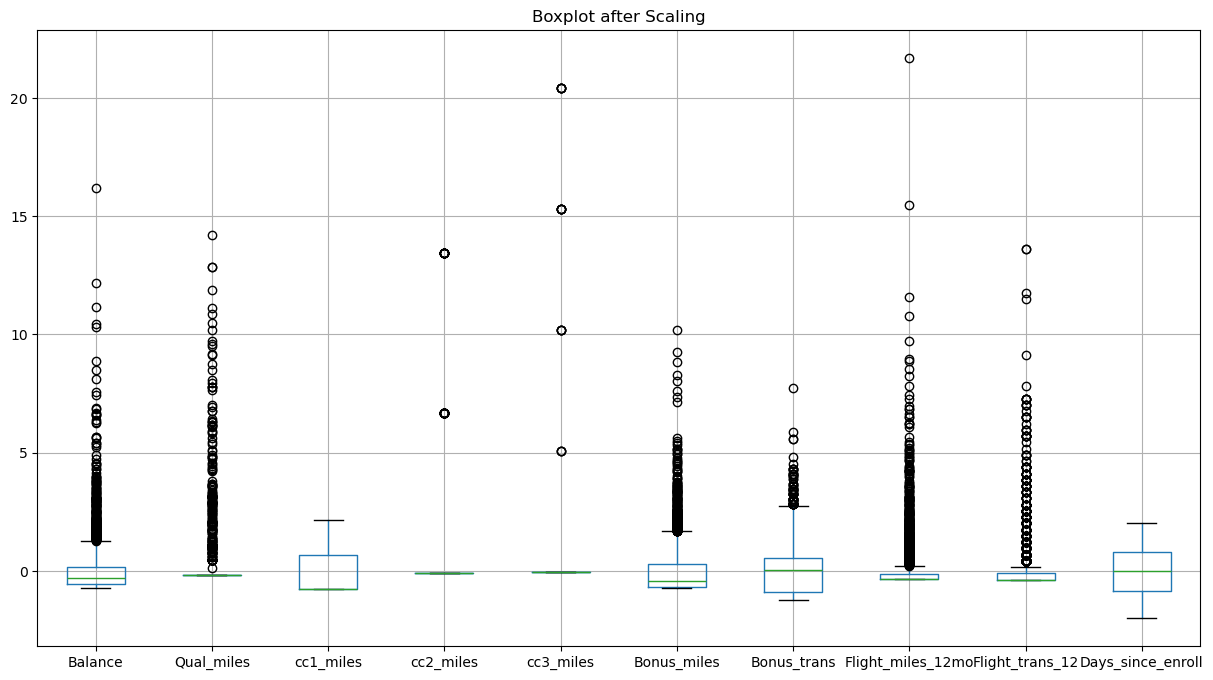

In [9]:
plt.figure(figsize=(15,8))
scaled_df.boxplot()
plt.title("Boxplot after Scaling")
plt.show()

### Step 3: K Means Clustering

In [10]:
# Elbow method to find best K
wcss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

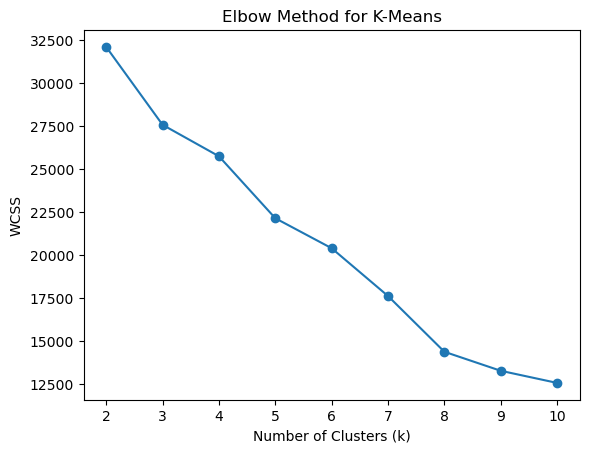

In [11]:
plt.plot(range(2,11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for K-Means")
plt.show()

In [12]:
# Fit KMeans with best K (say 4, check from graph)
kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(scaled_df)

In [13]:
# Silhouette Score
print("KMeans Silhouette Score:", silhouette_score(scaled_df, labels_kmeans))

KMeans Silhouette Score: 0.2758185306810566


### Step 4: Heirarchy Clustering

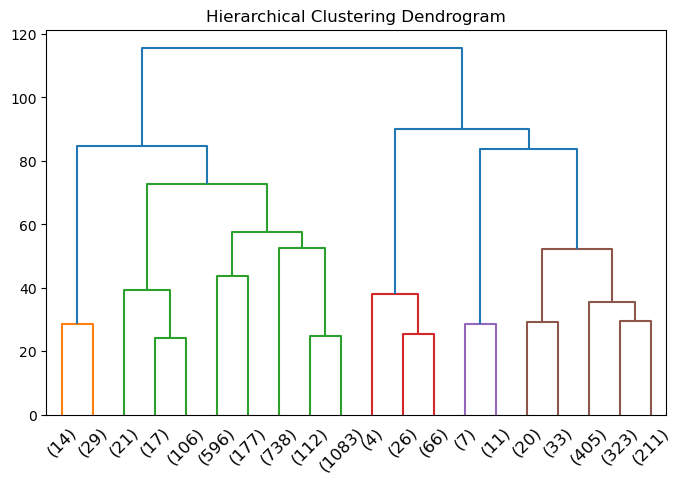

In [14]:
#dendrogram
plt.figure(figsize=(8,5))
linkage_matrix=linkage(scaled_df,method="ward")
dendrogram(linkage_matrix,truncate_mode="lastp",p=20,leaf_rotation=45)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [15]:
# Fit Agglomerative Clustering (say 4 clusters)
hc = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
labels_hc = hc.fit_predict(scaled_df)

In [16]:
print("Hierarchical Silhouette Score:" ,silhouette_score(scaled_df,labels_hc))

Hierarchical Silhouette Score: 0.3350233247024554


### Step 5: DBSCAN 

In [17]:
# Try DBSCAN with parameters
dbscan = DBSCAN(eps=2, min_samples=5)
labels_dbscan = dbscan.fit_predict(scaled_df)

# Count clusters (-1 = noise)
print("DBSCAN cluster labels:", np.unique(labels_dbscan))

# If more than 1 cluster, check silhouette
if len(set(labels_dbscan)) > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(scaled_df, labels_dbscan))
else:
    print("DBSCAN formed only one cluster or all noise.")


DBSCAN cluster labels: [-1  0  1  2  3]
DBSCAN Silhouette Score: 0.5610340787265323


### Step 6: visualization 2D PCA

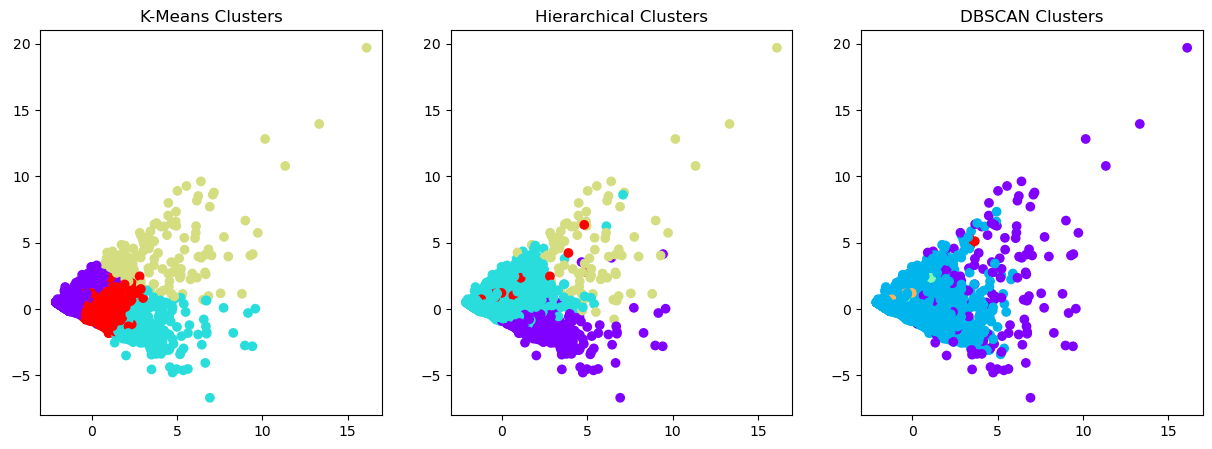

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

plt.figure(figsize=(15,5))

# KMeans
plt.subplot(1,3,1)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels_kmeans, cmap="rainbow")
plt.title("K-Means Clusters")

# Hierarchical
plt.subplot(1,3,2)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels_hc, cmap="rainbow")
plt.title("Hierarchical Clusters")

# DBSCAN
plt.subplot(1,3,3)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels_dbscan, cmap="rainbow")
plt.title("DBSCAN Clusters")

plt.show()
